In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
# plt.rcParams['figure.figsize'] = (15, 5)

# Reading data from a csv file

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [2]:
broken_df = pd.read_csv('data/bikes.csv')

In [3]:
# Look at the first 3 rows
broken_df[:3]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Set the encoding to `'latin1'` (the default is `'utf8'`)
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [4]:
fixed_df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


# Selecting a column

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

Here's an example:

In [5]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

We can also look at some basic statistics of each column.

In [41]:
fixed_df.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


In [44]:
fixed_df.count()

Berri 1                                310
Brébeuf (données non disponibles)        0
Côte-Sainte-Catherine                  310
Maisonneuve 1                          310
Maisonneuve 2                          310
du Parc                                310
Pierre-Dupuy                           310
Rachel1                                310
St-Urbain (données non disponibles)      0
dtype: int64

In [43]:
fixed_df.std()

Berri 1                                2169.271062
Brébeuf (données non disponibles)              NaN
Côte-Sainte-Catherine                   944.643188
Maisonneuve 1                          1450.715170
Maisonneuve 2                          2484.959789
du Parc                                1332.543266
Pierre-Dupuy                           1064.029205
Rachel1                                2039.315504
St-Urbain (données non disponibles)            NaN
dtype: float64

In [45]:
fixed_df.mean()

Berri 1                                2985.048387
Brébeuf (données non disponibles)              NaN
Côte-Sainte-Catherine                  1233.351613
Maisonneuve 1                          1983.325806
Maisonneuve 2                          3510.261290
du Parc                                1862.983871
Pierre-Dupuy                           1054.306452
Rachel1                                2873.483871
St-Urbain (données non disponibles)            NaN
dtype: float64

In [46]:
fixed_df.min()

Berri 1                                32.0
Brébeuf (données non disponibles)       NaN
Côte-Sainte-Catherine                   0.0
Maisonneuve 1                          33.0
Maisonneuve 2                          47.0
du Parc                                18.0
Pierre-Dupuy                            0.0
Rachel1                                 0.0
St-Urbain (données non disponibles)     NaN
dtype: float64

In [47]:
fixed_df.max()

Berri 1                                7077.0
Brébeuf (données non disponibles)         NaN
Côte-Sainte-Catherine                  3124.0
Maisonneuve 1                          4999.0
Maisonneuve 2                          8222.0
du Parc                                4510.0
Pierre-Dupuy                           4386.0
Rachel1                                6595.0
St-Urbain (données non disponibles)       NaN
dtype: float64

In [42]:
fixed_df.corr()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Berri 1,1.000000,NaN,0.967927,0.983599,0.982810,0.954039,0.805050,0.974996,NaN
Brébeuf (données non disponibles),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Côte-Sainte-Catherine,0.967927,NaN,1.000000,0.973182,0.982206,0.988534,0.685691,0.939409,NaN
Maisonneuve 1,0.983599,NaN,0.973182,1.000000,0.988494,0.968243,0.711397,0.945578,NaN
Maisonneuve 2,0.982810,NaN,0.982206,0.988494,1.000000,0.981027,0.716534,0.947573,NaN
du Parc,0.954039,NaN,0.988534,0.968243,0.981027,1.000000,0.634149,0.916624,NaN
Pierre-Dupuy,0.805050,NaN,0.685691,0.711397,0.716534,0.634149,1.000000,0.838632,NaN
Rachel1,0.974996,NaN,0.939409,0.945578,0.947573,0.916624,0.838632,1.000000,NaN
St-Urbain (données non disponibles),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

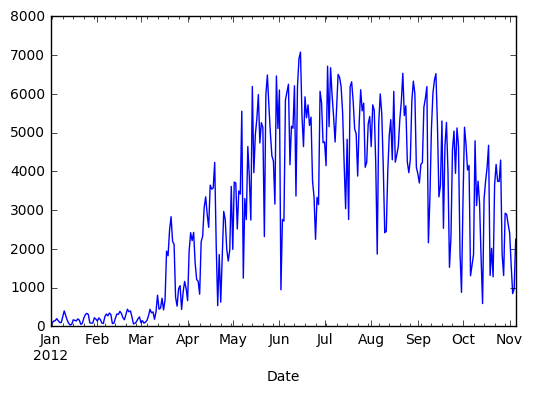

In [6]:
fixed_df['Berri 1'].plot()

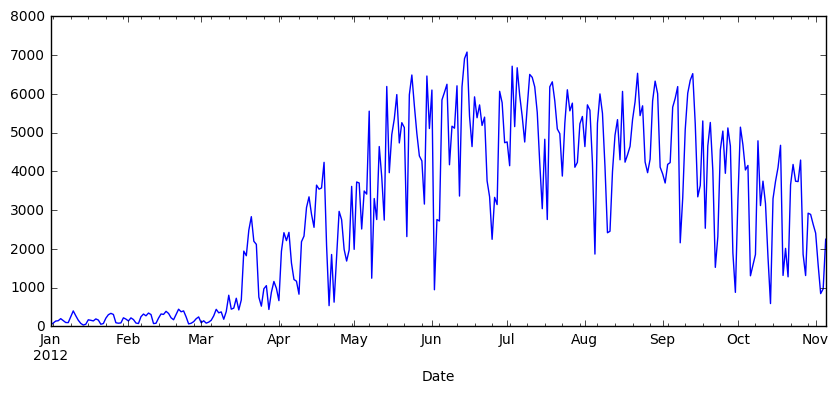

In [8]:
fixed_df['Berri 1'].plot(figsize=(10,4))

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

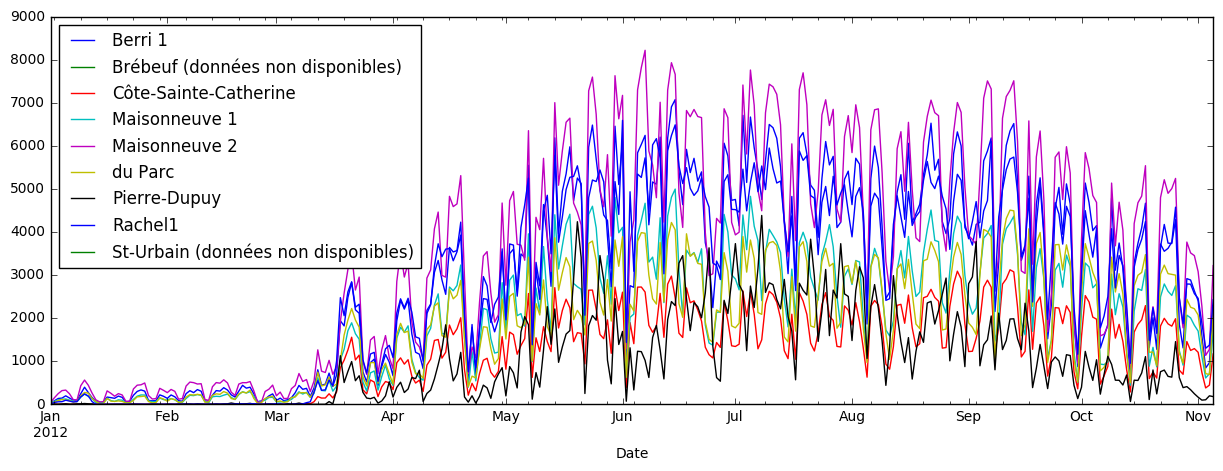

In [13]:
fixed_df.plot(figsize=(15, 5))

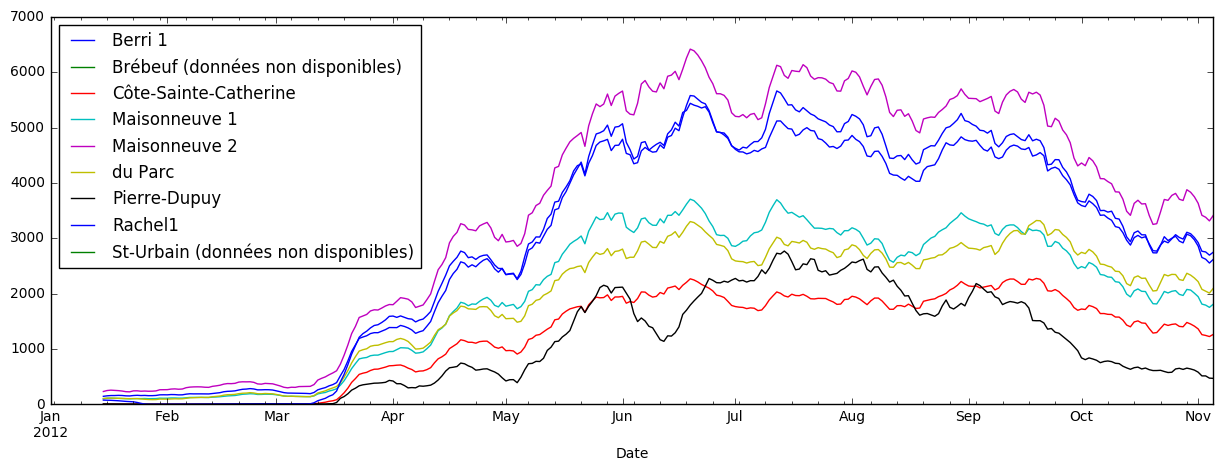

In [15]:
fixed_df.rolling(window=15).mean().plot(figsize=(15,5))

What if we want to know the cumulative number of people who have biked the path instead of just the daily number?

In [21]:
import numpy as np
cumulative_df = fixed_df.apply(np.cumsum).copy()

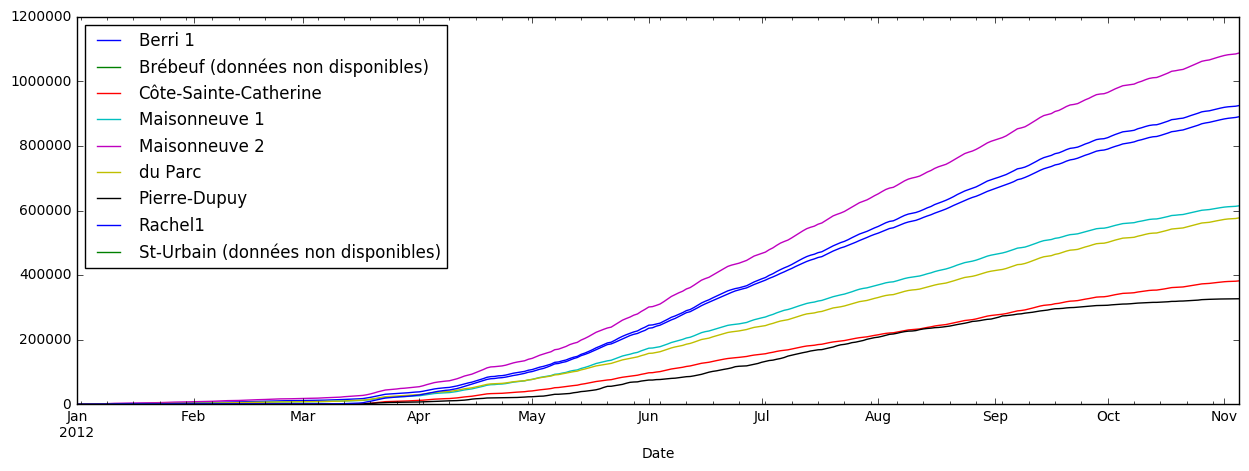

In [23]:
cumulative_df.plot(figsize=(15,5))

What if we wanted to know the distribution of visits?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5622bf3410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f562199c4d0>]], dtype=object)

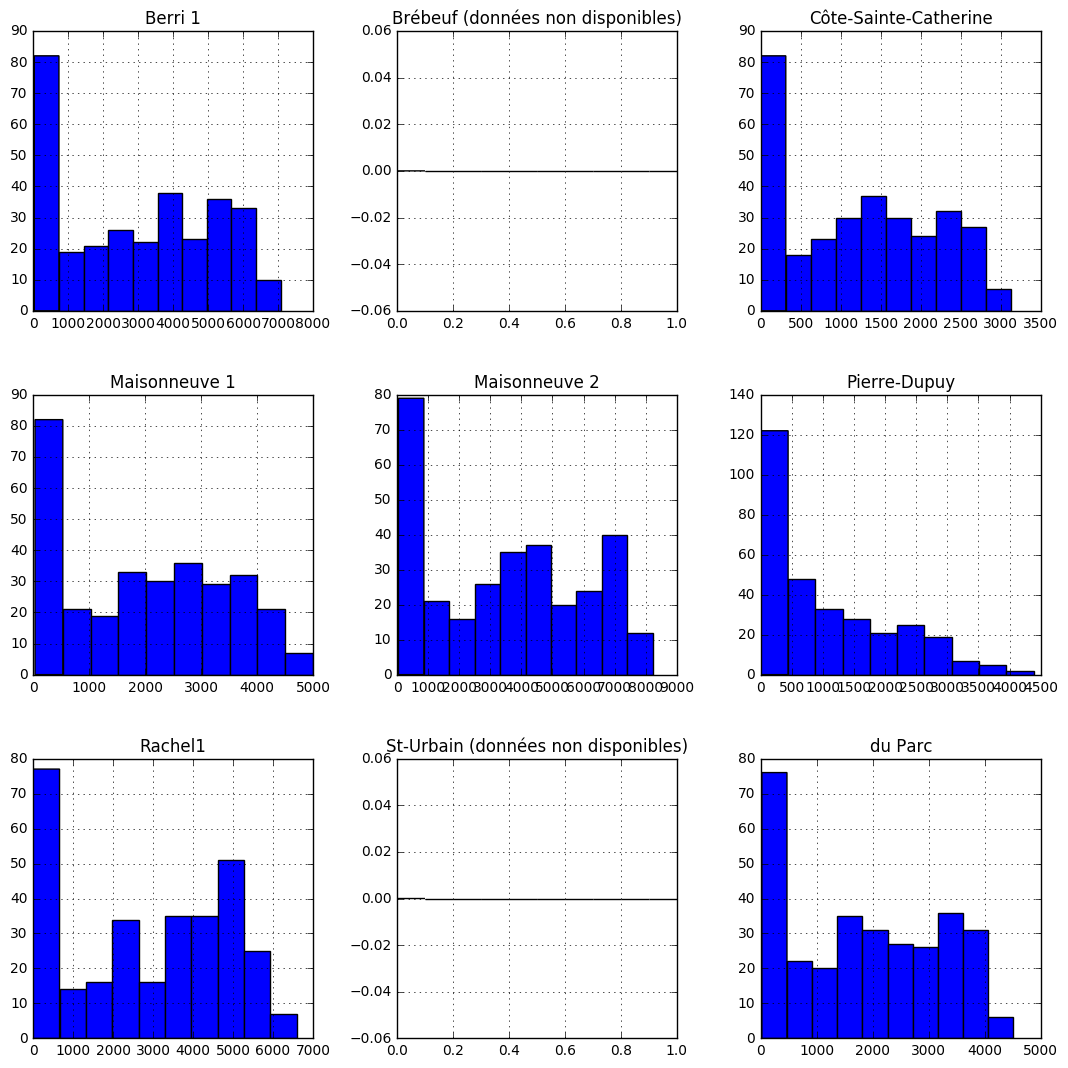

In [26]:
fixed_df.hist(figsize=(13,13))

We see here that most trails get very few visitors most days.

In [38]:
fixed_df.columns

Index([u'Berri 1', u'Brébeuf (données non disponibles)',
       u'Côte-Sainte-Catherine', u'Maisonneuve 1', u'Maisonneuve 2',
       u'du Parc', u'Pierre-Dupuy', u'Rachel1',
       u'St-Urbain (données non disponibles)'],
      dtype='object')